In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [11]:
def get_metrics(x_vals, y_vals, knn):
    y_pred = knn.predict(x_vals)
    conf_matrix = confusion_matrix(y_vals, y_pred)
    precision = precision_score(y_vals, y_pred)
    recall = recall_score(y_vals, y_pred)
    f1 = f1_score(y_vals, y_pred)
    accuracy = accuracy_score(y_vals, y_pred)
    return precision, conf_matrix, recall, f1, accuracy

def evaluate_knn_classifier(X_train, X_test, y_train, y_test, n_neighbors=3):
    """
    Trains and evaluates a K-Nearest Neighbors (KNN) classifier on training and testing data.

    Args:
        X_train (numpy.ndarray or pandas.DataFrame): The training feature data.
        X_test (numpy.ndarray or pandas.DataFrame): The testing feature data.
        y_train (numpy.ndarray or pandas.Series): The training target variable.
        y_test (numpy.ndarray or pandas.Series): The testing target variable.
        n_neighbors (int): The number of neighbors to use in the KNN classifier.

    Returns:
        tuple: A tuple containing the training and testing performance metrics (accuracy, confusion matrix, precision, recall, F1 score).
    """
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    return *get_metrics(X_train, y_train, knn), *get_metrics(X_test, y_test, knn)

def split_data(X, y, test_size=0.3):
    """
    Splits data into training and testing sets.

    Args:
        X (numpy.ndarray or pandas.DataFrame): The feature data.
        y (numpy.ndarray or pandas.Series): The target variable.
        test_size (float): The proportion of the dataset to include in the test split.

    Returns:
        tuple: A tuple containing the training and testing data (X_train, X_test, y_train, y_test).
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test


df = pd.read_csv('../Datasets/final_test.csv', nrows=10000)
df.rename(columns={'text': 'text', 'label': 'generated'}, inplace=True)
df = df.dropna()
    
vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 2), stop_words='english')
vector_data = vectorizer.fit_transform(df['text']).toarray()

(train_accuracy, train_conf_matrix, train_precision, train_recall, train_f1,
 test_accuracy, test_conf_matrix, test_precision, test_recall, test_f1) = evaluate_knn_classifier(*split_data(vector_data, df["generated"]))


print("Training Accuracy:", train_accuracy)
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

print("-" * 20)

print("Testing Accuracy:", test_accuracy)
print("Testing Confusion Matrix:")
print(test_conf_matrix)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)

print("-" * 20)

accuracy_difference = abs(train_accuracy - test_accuracy)

if accuracy_difference > 0.07:
    if train_accuracy > test_accuracy:
        print("The model is overfitting, as it performs significantly better on the training set than the test set.")
    else:
        print("The model is underfitting, as it performs significantly better on the test set than the training set.")
else:
    print("The model is well-fitted, as the difference in performance on the training and test sets is not significant.")

Training Accuracy: 0.9576369996113486
Training Confusion Matrix:
[[4343  109]
 [  84 2464]]
Training Precision: 0.967032967032967
Training Recall: 0.9623120484280414
Training F1 Score: 0.9724285714285714
--------------------
Testing Accuracy: 0.8981981981981982
Testing Confusion Matrix:
[[1808  113]
 [  82  997]]
Testing Precision: 0.9240037071362373
Testing Recall: 0.910918227501142
Testing F1 Score: 0.935
--------------------
The model is well-fitted, as the difference in performance on the training and test sets is not significant.


In [13]:
def evaluate_price_prediction(purchase_data_matrix, total_price_vector):
    """
    Calculates the price of each item using pseudo-inverse and evaluates the prediction using MSE, RMSE, MAPE, and R2.

    Args:
        purchase_data_matrix (numpy.ndarray or pandas.DataFrame): The matrix representing the purchase data (excluding total price).
        total_price_vector (numpy.ndarray or pandas.Series): The vector representing the total price for each purchase.

    Returns:
        tuple: A tuple containing the price of each item and the evaluation metrics (MSE, RMSE, MAPE, R2).
    """
    A_INV = np.linalg.pinv(purchase_data_matrix)
    price_of_each_item = (A_INV @ total_price_vector)

    y_pred = purchase_data_matrix @ price_of_each_item
    MSE = np.square(np.subtract(total_price_vector, y_pred)).mean()
    RMSE = np.sqrt(MSE)
    MAPE = np.mean(np.abs((total_price_vector - y_pred) / total_price_vector)) * 100
    R2 = 1 - (np.square(total_price_vector - y_pred).sum() / np.square(total_price_vector - total_price_vector.mean()).sum())

    return price_of_each_item, MSE, RMSE, MAPE, R2


purchase_data_df = pd.read_excel('../Datasets/Lab Session Data.xlsx', sheet_name='Purchase data', usecols='A:E')
purchase_data = purchase_data_df.iloc[:, 1:4]
total_price = purchase_data_df.iloc[:, 4]

print("Dimensionality of the vector space:", purchase_data_df.shape)
print("Number of vectors:", purchase_data_df.shape[0])
print("Rank of matrix A:", np.linalg.matrix_rank(purchase_data))

print()
price_of_each_item, MSE, RMSE, MAPE, R2 = evaluate_price_prediction(purchase_data, total_price)
print("Price of each item:", price_of_each_item)
print()

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAPE:", MAPE)
print("R2:", R2)

Dimensionality of the vector space: (10, 5)
Number of vectors: 10
Rank of matrix A: 3

Price of each item: [ 1. 55. 18.]

MSE: 3.392732981174528e-27
RMSE: 5.82471714435519e-14
MAPE: 2.52211295319421e-14
R2: 1.0


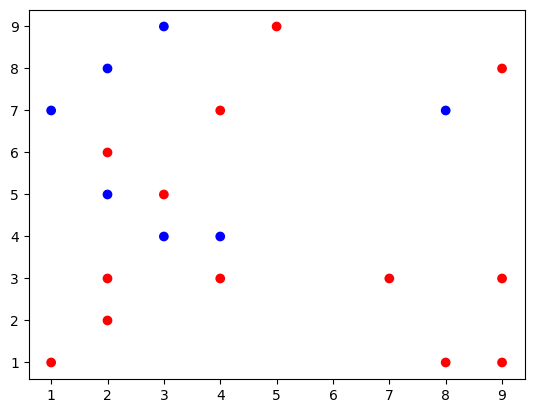

In [14]:
import matplotlib.pyplot as plt

def generate_data(l, h, n, d):
    """
    Generates a synthetic dataset with two features (X, Y) and a binary class label.

    Args:
        l (int): The lower bound of the range for feature values.
        h (int): The upper bound of the range for feature values.
        n (int): The number of data points to generate.
        d (int): The power of 10 to divide the feature values by (to scale them down).

    Returns:
        pandas.DataFrame: A DataFrame containing the generated data with columns 'X', 'Y', and 'Class'.
    """
    x_values = np.arange(l * 10 ** d, h * 10 ** d)
    y_values = np.arange(l * 10 ** d, h * 10 ** d)
    all_points = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1, 2) / (10 ** d)
    np.random.shuffle(all_points)
    features = all_points[:n]
    classes = np.random.randint(0, 2, (n, 1))

    data = np.concatenate((features, classes), axis=1)
    return pd.DataFrame(data, columns=['X', 'Y', 'Class'])


color_map = {0: 'red', 1: 'blue'}
train_df = generate_data(1, 10, 20, 0)

plt.scatter(train_df['X'], train_df['Y'], c=train_df['Class'].map(color_map))
plt.show()

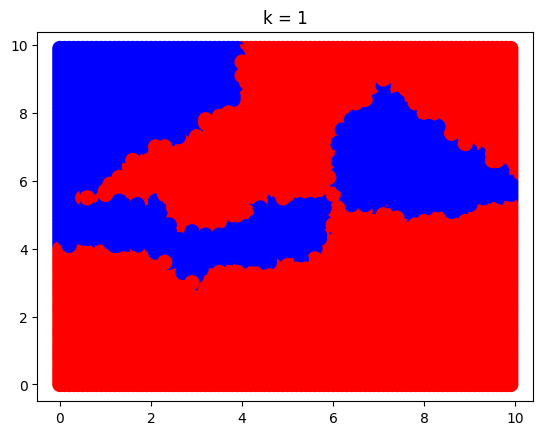

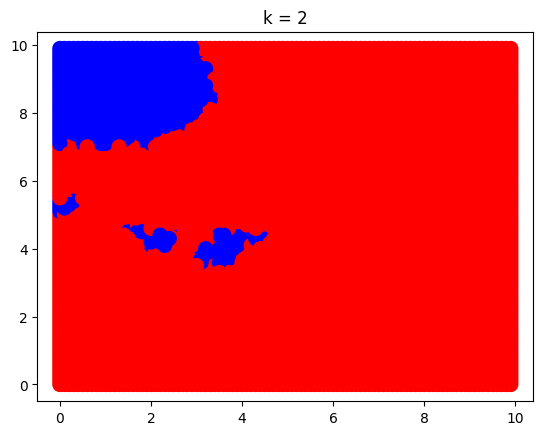

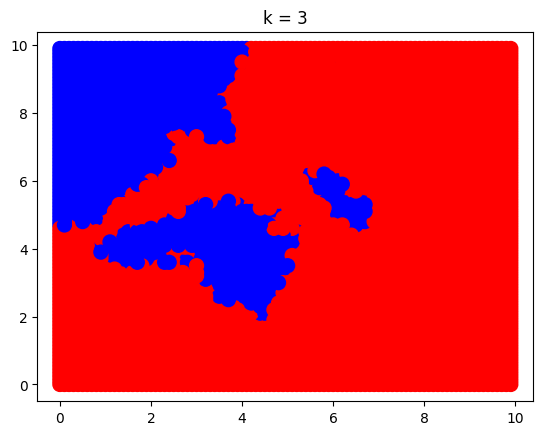

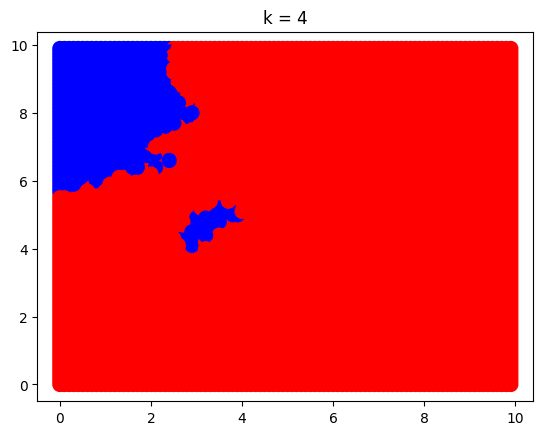

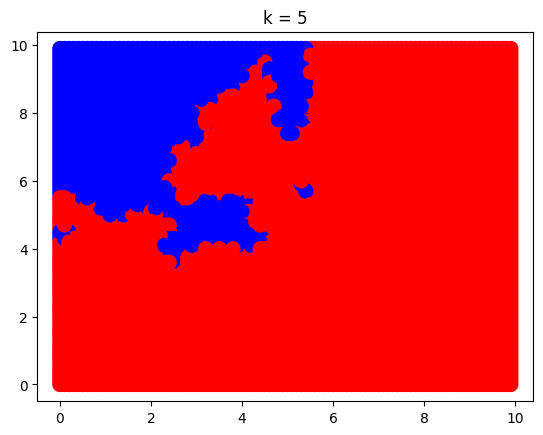

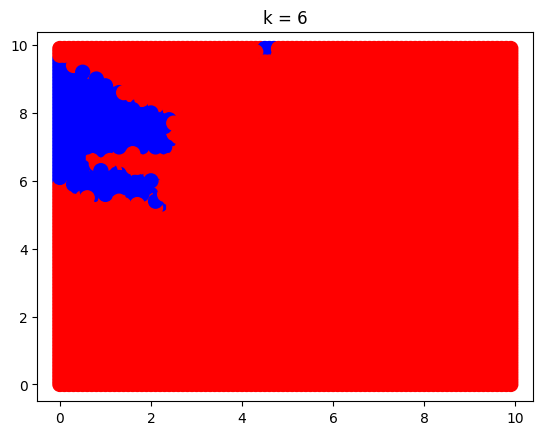

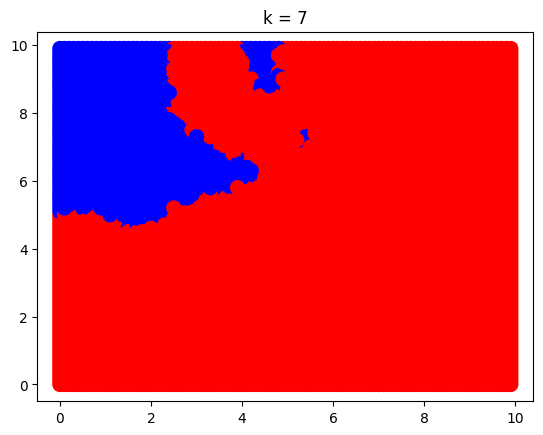

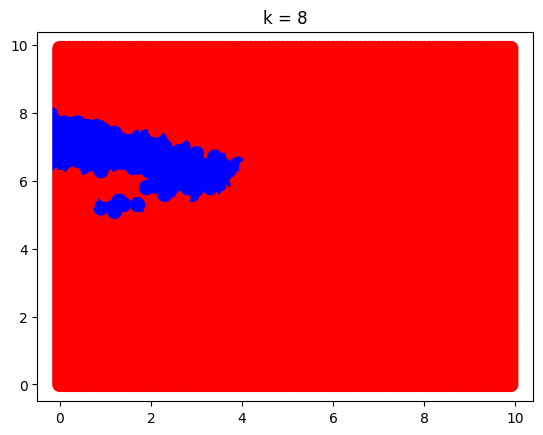

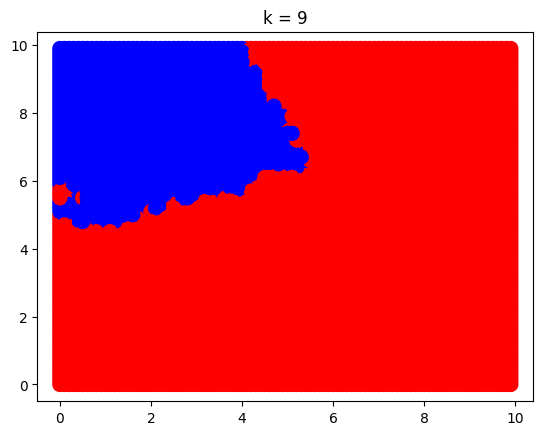

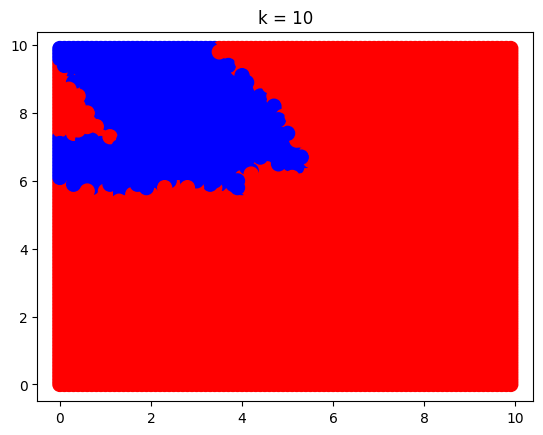

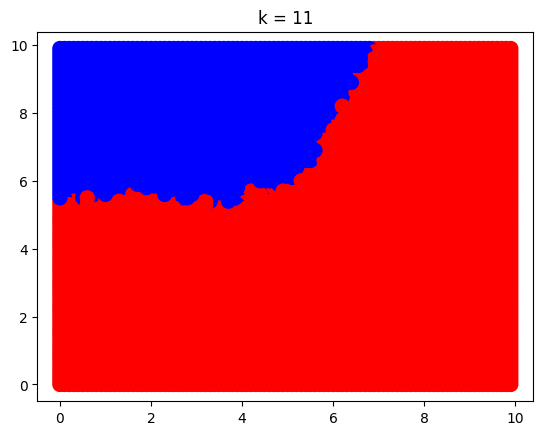

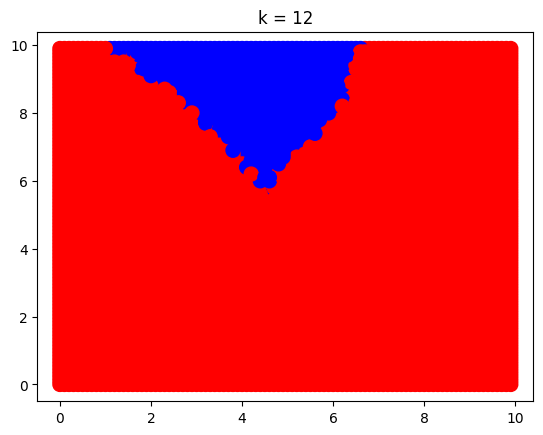

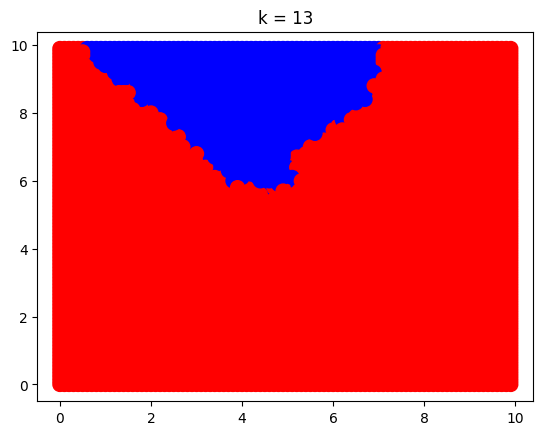

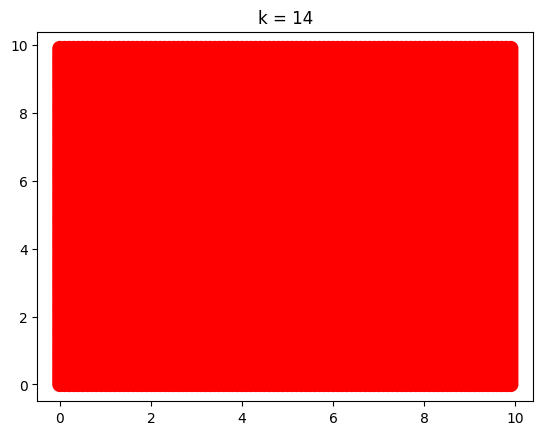

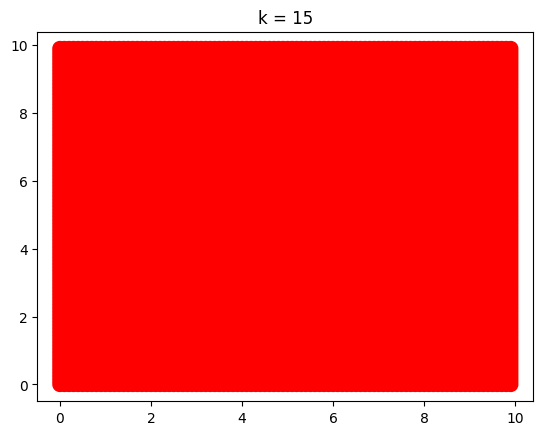

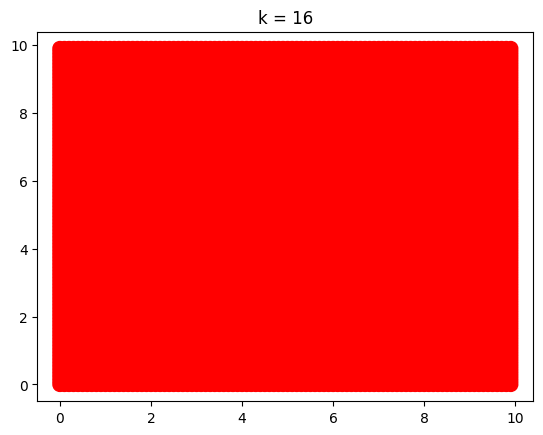

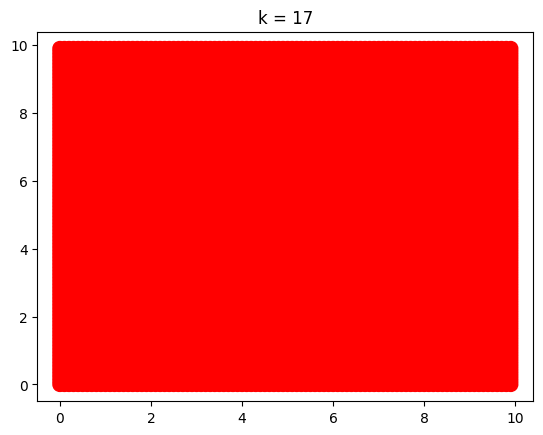

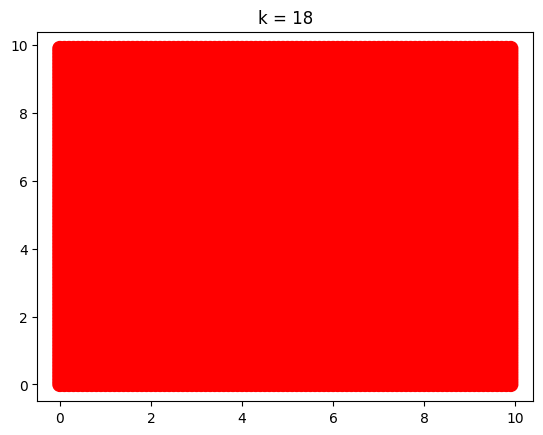

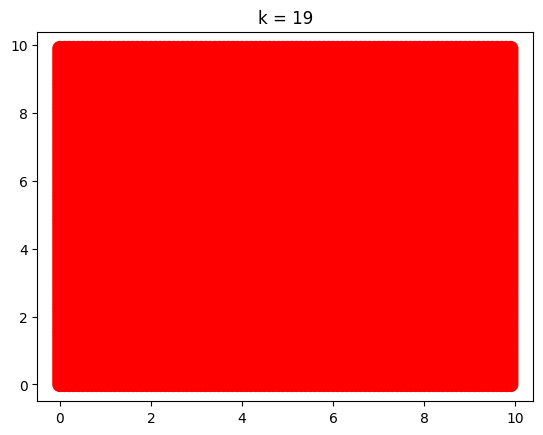

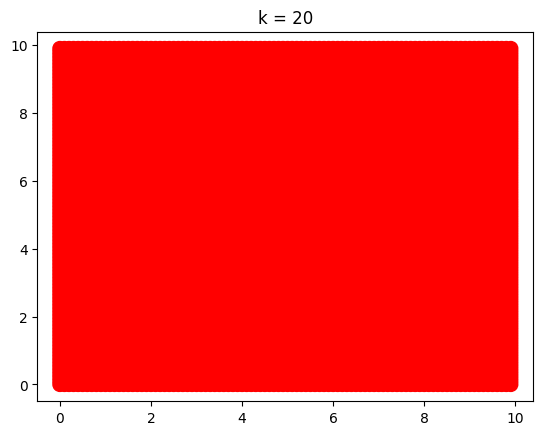

In [15]:
test_df = generate_data(0, 10, 10000, 1)

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(train_df[['X', 'Y']], train_df['Class'])
    test_df['Class'] = knn.predict(test_df[['X', 'Y']])
    plt.title(f'k = {i+1}')
    plt.scatter(test_df['X'], test_df['Y'], c=test_df['Class'].map(color_map), s=100)
    plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
params = {
    'n_neighbors': np.arange(1, 10),
}

grid_search = GridSearchCV(knn, params)
grid_search.fit(train_df[['X', 'Y']], train_df['Class'])

grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=2)